# More Pandas and Numpy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bitcoin vs Ether

## import data

In [2]:
df = pd.read_csv(
'data2/btc-eth-prices-outliers.csv',
index_col = 0,
parse_dates = True)

In [3]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot:xlabel='Timestamp'>

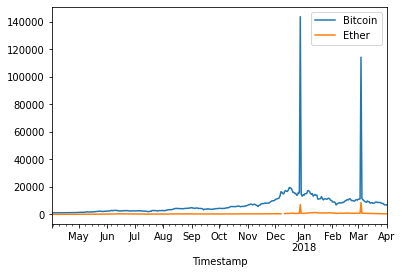

In [4]:
df.plot()

We seem to have outliers for both ether and bitcoin in late december of 2017 as well as early march 2018.
We seem to have missing data for ether in early December on 2017

<AxesSubplot:xlabel='Timestamp'>

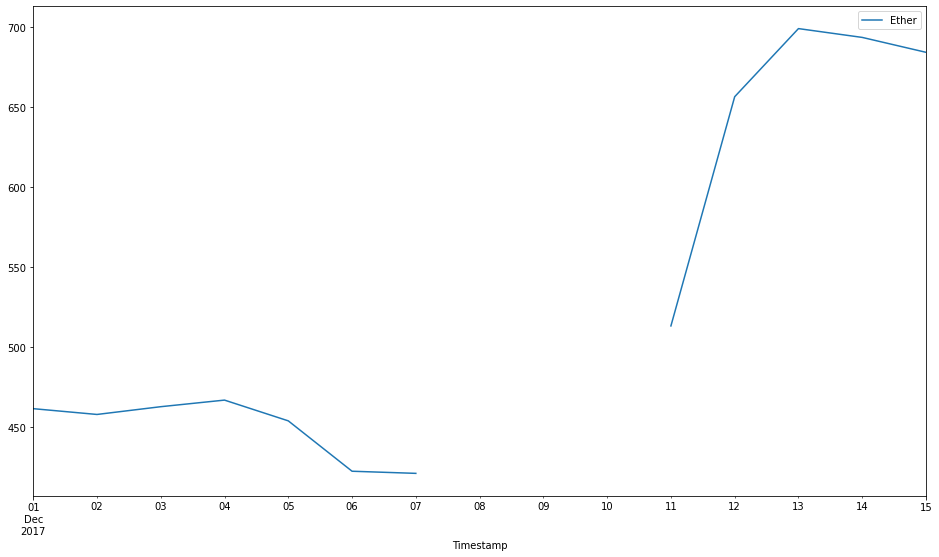

In [5]:
df.loc['2017-12':'2017-12-15'].plot(y='Ether', figsize=(16,9))

look like data is missing on the 8th, 9th and 10th, to check we can use isna() for the relevent rows

In [6]:
df.loc['2017-12': '2017-12-15', 'Ether'].isna().values.any()

True

In [7]:
df.loc['2017-12':'2017-12-15', 'Ether'].isna()

Timestamp
2017-12-01    False
2017-12-02    False
2017-12-03    False
2017-12-04    False
2017-12-05    False
2017-12-06    False
2017-12-07    False
2017-12-08     True
2017-12-09     True
2017-12-10     True
2017-12-11    False
2017-12-12    False
2017-12-13    False
2017-12-14    False
2017-12-15    False
Name: Ether, dtype: bool

What to do with the missing values? We can drop the missing values, or fill them

In [8]:
df.loc['2017-12':'2017-12-15','Ether'].fillna(method = 'bfill')

Timestamp
2017-12-01    461.58
2017-12-02    457.96
2017-12-03    462.81
2017-12-04    466.93
2017-12-05    453.96
2017-12-06    422.48
2017-12-07    421.15
2017-12-08    513.29
2017-12-09    513.29
2017-12-10    513.29
2017-12-11    513.29
2017-12-12    656.52
2017-12-13    699.09
2017-12-14    693.58
2017-12-15    684.27
Name: Ether, dtype: float64

this seems good, lets do this!!!

In [9]:
df.fillna(method='bfill', inplace=True)

<AxesSubplot:xlabel='Timestamp'>

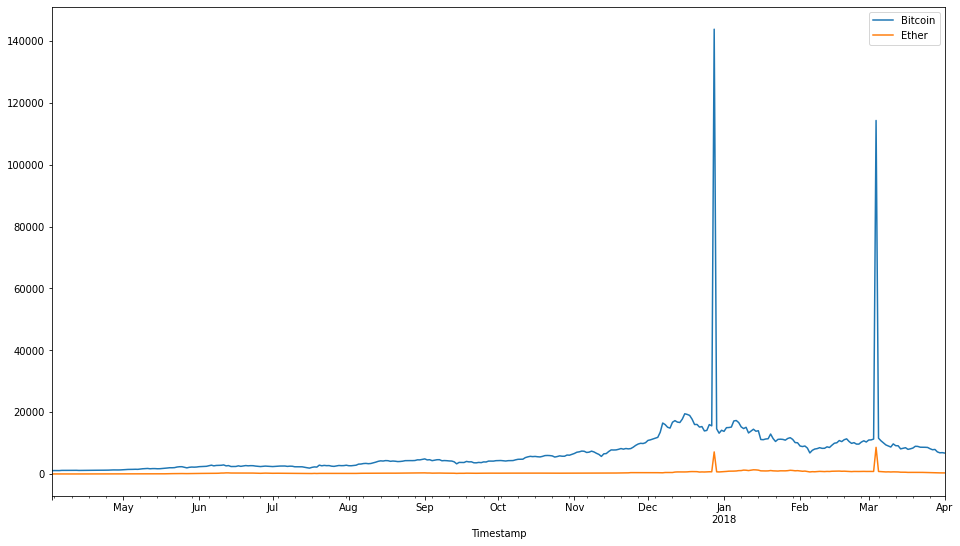

In [10]:
df.plot(figsize = (16,9))

now we can work on the spikes

<AxesSubplot:xlabel='Timestamp'>

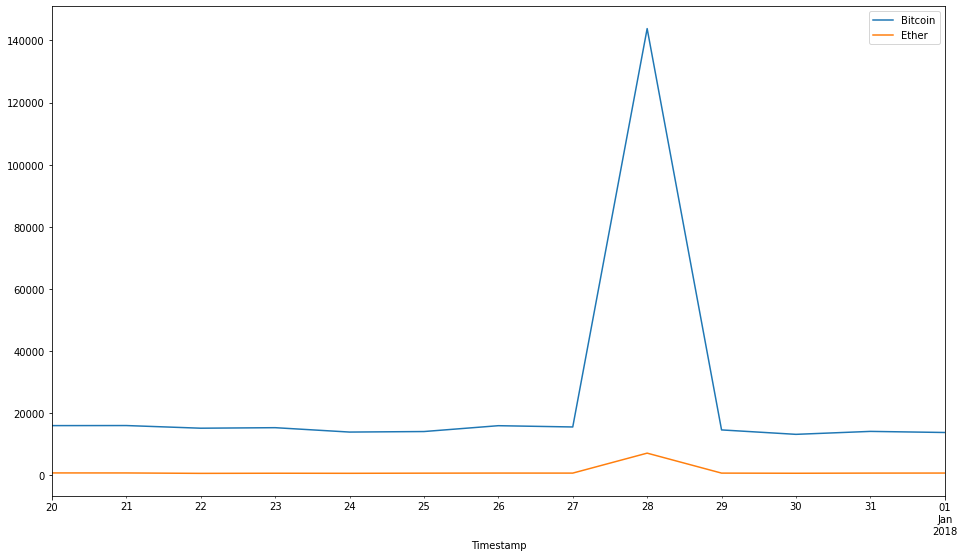

In [11]:
df['2017-12-20':'2018-01-01'].plot(figsize =(16,9))

<AxesSubplot:xlabel='Timestamp'>

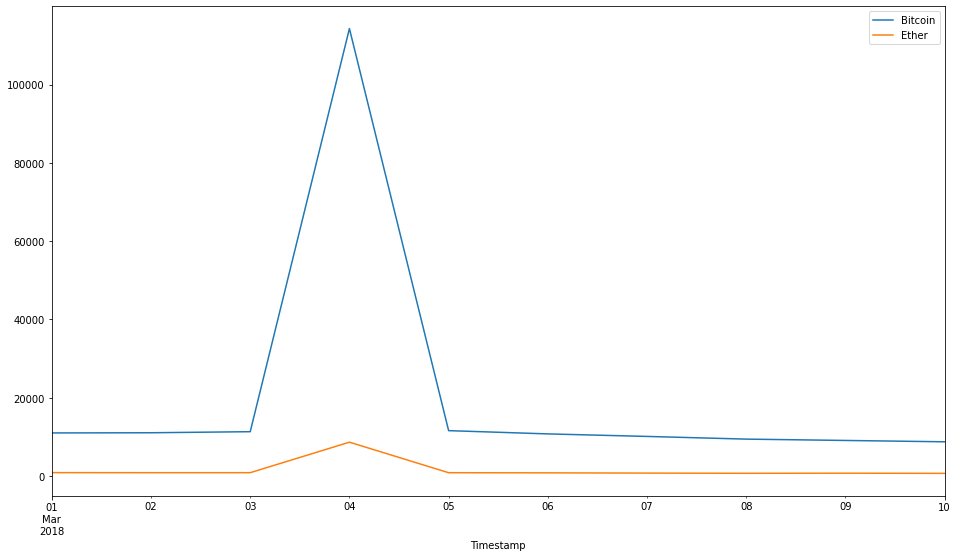

In [12]:
df['2018-3':'2018-03-10'].plot(figsize =(16,9))

we see the errors are on `2017-12-28`, `2018-03-04`

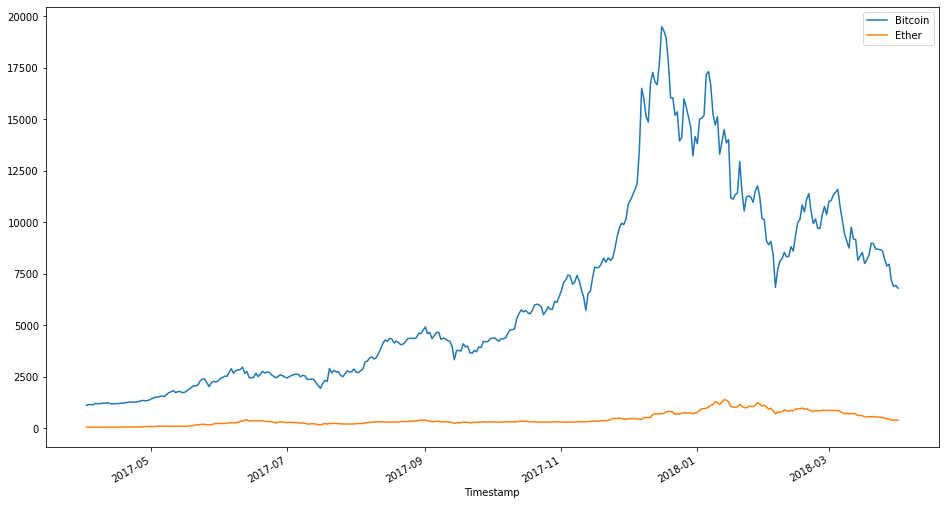

In [13]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))
fig = df_cleaned.plot(figsize=(16,9)).get_figure()


lets save the figure of this cleaned DataFrame! 

In [14]:
fig.savefig('cleaned_graph.png')

## Cleaning Analysis

we need tools to handle our data. We'll use analytical methods to identify these outliers or these skewed values.

### Central Tendency

**mean** , most common however is sensitive to outliers. Lets compare dataframe.mean() before and after removal of outliers

In [15]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [16]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

**median** and **mode**

In [17]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

In [18]:
# df.mode() - doesn't make much sence with continuous data

## Visualising distribution

<AxesSubplot:ylabel='Frequency'>

<Figure size 1296x648 with 0 Axes>

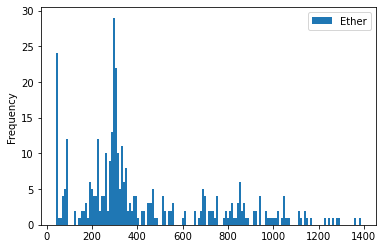

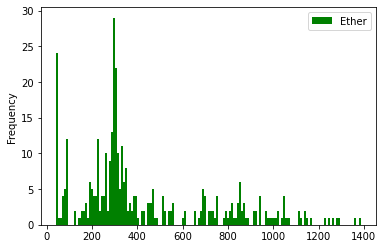

In [19]:
fig = plt.figure(figsize=(18,9))

df_cleaned.plot(kind='hist', y='Ether', bins=150)

df_cleaned.plot(kind='hist', x='Bitcoin', bins=150, color='green')

C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.

<AxesSubplot:xlabel='Bitcoin', ylabel='Density'>

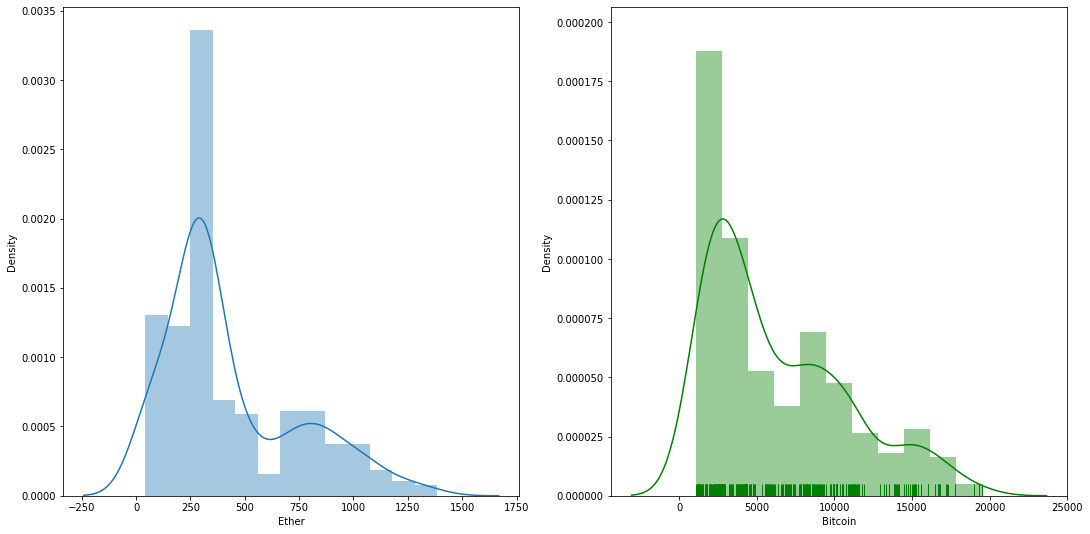

In [23]:
fig = plt.figure(figsize=(18, 9))

fig.add_subplot(1,2,1)
sns.distplot(df_cleaned['Ether'])

fig.add_subplot(1,2,2)
sns.distplot(df_cleaned['Bitcoin'], rug=True, color = 'green')


### we can also visualize a cumulative plot:

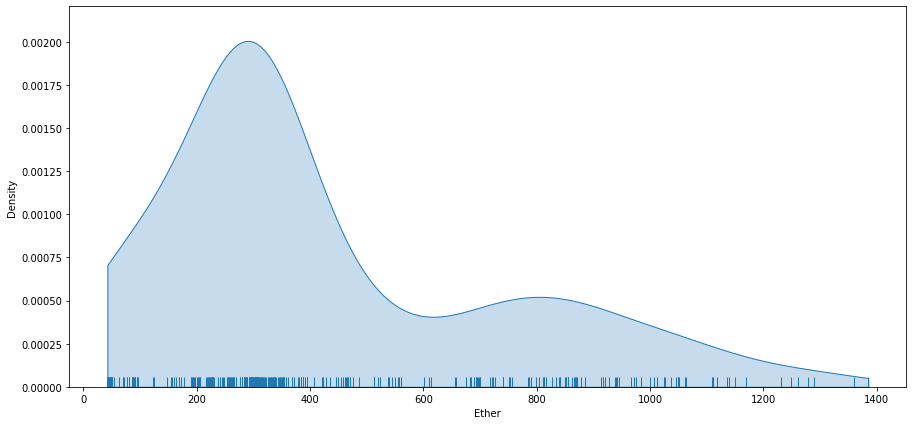

In [21]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Ether'], ax=ax);

## Visualizing bivariate distributions

The most common way to observe a bivvariate distribution is a scatterplot, the `jointplot` will also include the distribution of the variables

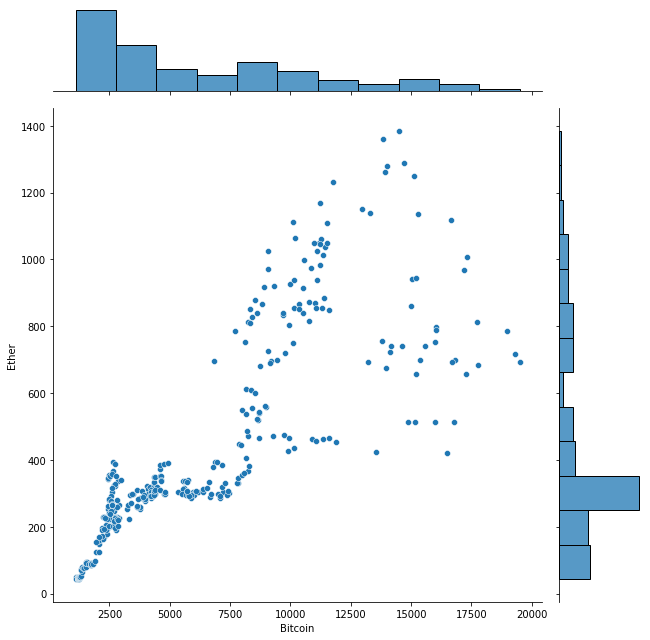

In [25]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, height=9)

#### Another plotting method is to use the **sns.regplot()** method, this fits a linear regression model in the plot

<AxesSubplot:xlabel='Bitcoin', ylabel='Ether'>

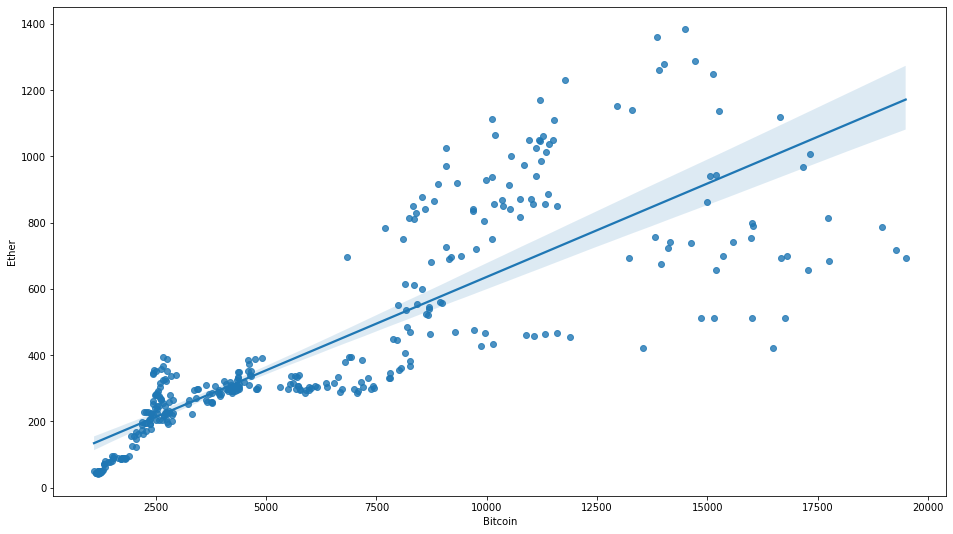

In [27]:
fig, ax = plt.subplots(figsize=(16,9))
sns.regplot(x='Bitcoin', y='Ether', data=df_cleaned, ax=ax)

### Quantiles and Percentiles

In [28]:
Pentile = df_cleaned['Bitcoin'].quantile(0.2)

C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


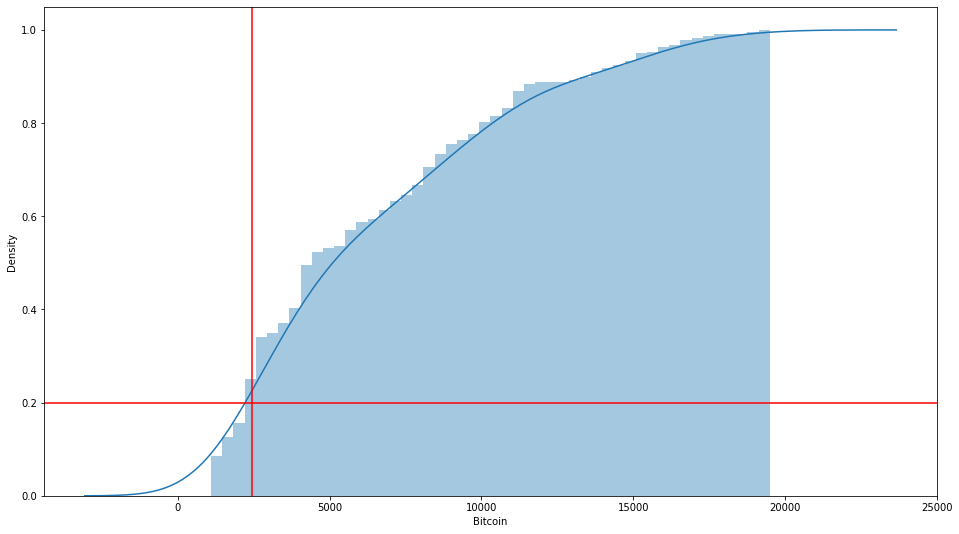

In [34]:
fig, ax = plt.subplots(figsize=(16,9))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins = 50, hist_kws = dict(cumulative=True),
            kde_kws=dict(cumulative=True))


ax.axhline(0.2, color='red')
ax.axvline(Pentile, color='red')

# Dispersion

We'll use a few methods to measure dispersion in our dataset, most of them well know

* Range
* Variance and Standard Deviation
* IQR

#### Range

In [35]:
df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

recall this is with the uncleanded data, clearly range is highly effected by outliers

In [39]:
(df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()).round(4)

18399.5142

Visually this look more likely to be correct!

#### Variance and Standard Deviation

In [43]:
df_cleaned['Bitcoin'].std()

4513.757662530282

In [45]:
df_cleaned['Bitcoin'].var()

20374008.236050833

#### Analytical Analysis of invalid values

Z score: A z-score describes the position of a raw score in terms of its distance from the mean, when measured in standard deviation units. The z-score is positive if the value lies above the mean, and negative if it lies below the mean.

C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


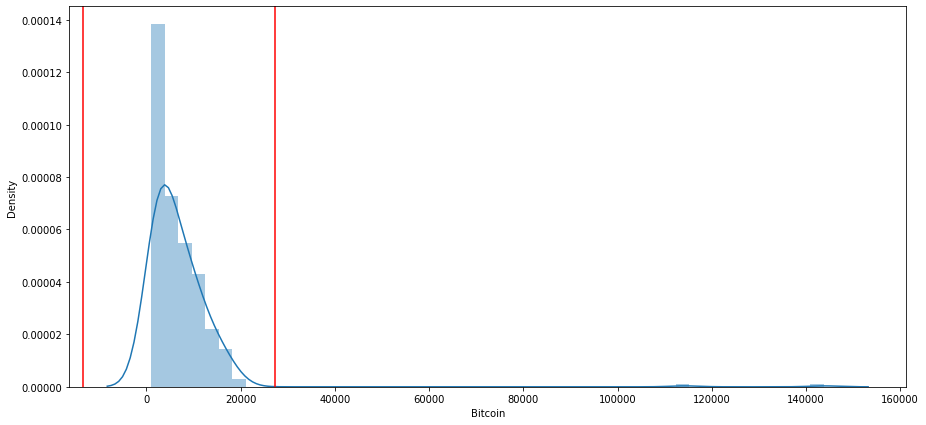

In [46]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()
# two Z scores above and below the mean

fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

At first glance the positive limit seems to be a good measure. However, our lower limit is a bit off this is ok as negative values are invalid!

#### Using IQRs

We can use the IQR instead of std if we think that the standard deviation might be too affected by the outliers/invalid values.

C:\Users\Tom\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


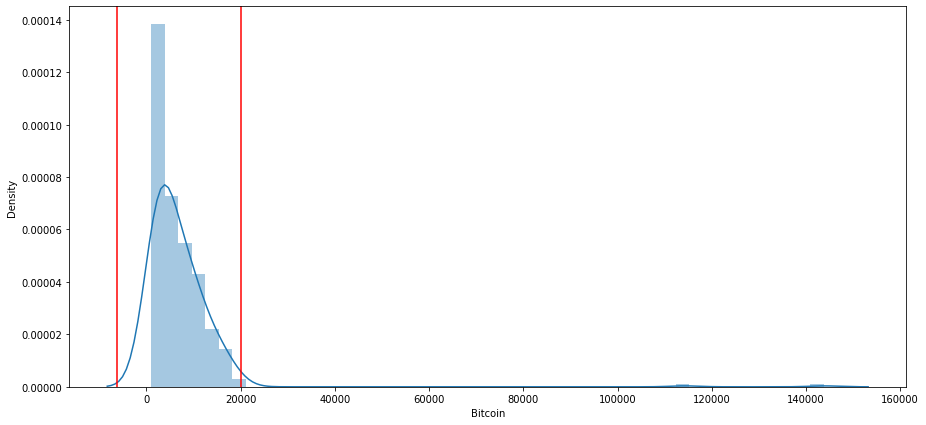

In [47]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Now this look a little less precice however still fairly good.

### Cleaning invalid values analytically

<AxesSubplot:xlabel='Timestamp'>

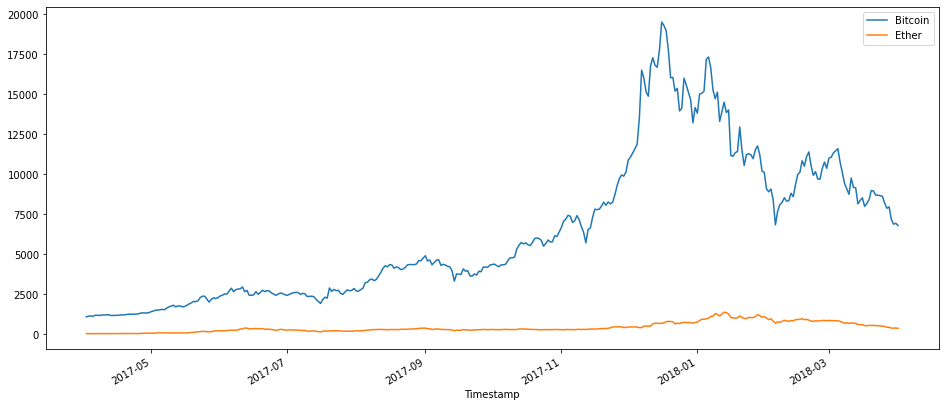

In [49]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

<AxesSubplot:xlabel='Timestamp'>

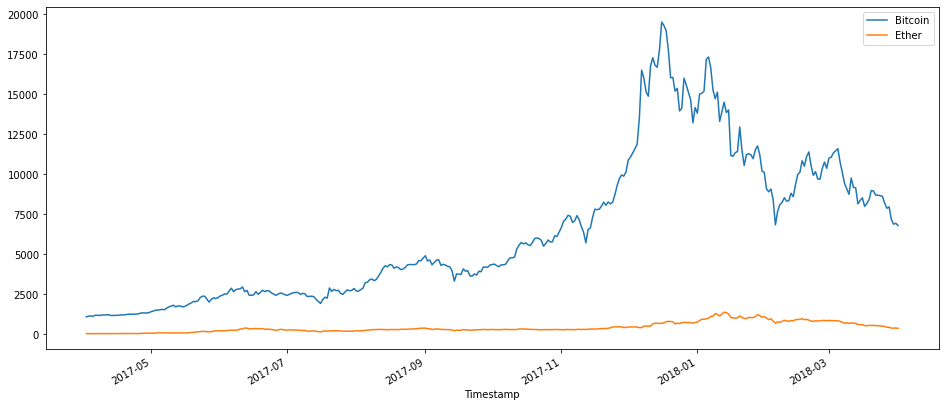

In [50]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))